# Part 2: Dynamical spin structure factor

## Part a

In [122]:
import a_mps_Gio, b_model_Gio, c_tebd_Gio
import numpy as np
from scipy.linalg import svd
import importlib 
import matplotlib.pyplot as plt


In [24]:
importlib.reload(a_mps_Gio)
importlib.reload(b_model_Gio)
importlib.reload(c_tebd_Gio)

<module 'c_tebd_Gio' from '/Users/Giovanni/Desktop/Fopra32/fopra32_summerterm2024/c_tebd_Gio.py'>

In [123]:
L = 30
J = 1
g = 0.6

sigmay = np.array([[0,-1j],[1j,0]])
sigmax = np.array([[0,1],[1,0]])


## Right code!

In [125]:
def correlation_Ctj(L, J, g, X, Y, T): #model - Hamiltonian, psi - class of wave function, T - last time step 
    Groundstate = c_tebd_Gio.example_TEBD_gs_finite(L,J,g)
    psi = Groundstate[1]
    model = Groundstate[2]
    psi1 = psi.copy() #take a copy of psi which is ground state
    S = []
    i = L//2 # i= L//2 index of Y
    tensor1 = np.tensordot(psi.Bs[i], Y, [1,1]) # vL [i] vR, i [i*] -> vL vR i
    psi.Bs[i] = tensor1.transpose([0,2,1])
    U_bond = c_tebd_Gio.calc_U_bonds_real(model, 0.1)
    result = []
    for r in range(T):
        c_tebd_Gio.run_TEBD(psi, U_bond, N_steps=1, chi_max=100, eps=1.e-10) #found new psi by applying e^-iHdt
        S.append(psi.entanglement_entropy())
        tensor1 = [np.tensordot(psi.Bs[L-1], psi1.Bs[L-1].conj(), [[1,2],[1,2]])] # vL [i] [vR] , vL* [i*] [vR*] -> vL vL*
        k=0
        #indeces of Bs go from 0 to L-1
        #for j in range(10) goes from 0 to 9 
        #for j in range (9,0,-1) goes from 9 to 1
        for j in range(L-2,0,-1):
            tensor2 = np.tensordot(psi.Bs[j],tensor1[k], [2,0]) # vL i [vR] ,[vL] vL* -> vL i vL*
            tensor1.append(np.tensordot(tensor2, psi1.Bs[j].conj(), [[1,2],[1,2]])) # vL [i] [vL*], vL* [i*] [vR*] ->  vL vL*
            #tensor2 = np.tensordot(psi1.Bs[j], psi.Bs[j].conj(), [1,1])  vL [i] vR , vL* [i*] vR* -> vL vR vL* vR*
            #tensor1.append(np.tensordot(tensor2,tensor1[k],[[1,3],[0,1]])) # vL [vR] vL* [vR*], [vL] [vL*] -> vL vL*
            k+=1
        # print(len(tensor1)) 
        #k = L-1
        result.append([])
        tensorA = np.tensordot(psi.Bs[0], psi1.Bs[0].conj(),[[0,1],[0,1]]) # [vL] [i] vR , [vL*] [i*] vR* -> vR vR*
        tensorB = np.tensordot(psi.Bs[0], X, [1,1]) # vL [i] vR , i [i*] -> vL vR i
        tensorC = np.tensordot(tensorB,psi1.Bs[0].conj(), [[0,2],[0,1]]) # [vL] vR [i], [vL*] [i*] vR* -> vR vR*
        result[r].append(np.tensordot(tensorC,tensor1[L-2], [[0,1],[0,1]])) # [vR] [vR*], [vL] [vL*]

        for j in range(1,L-1):
            tensorB = np.tensordot(psi.Bs[j], X, [1,1]) # vL [i] vR , i [i*] -> vL vR i
            tensorbeforeC = np.tensordot(tensorA, tensorB, [0,0]) # [vR] vR*, [vL] vR i -> vR* vR i
            tensorC = np.tensordot(tensorbeforeC,psi1.Bs[j].conj(), [[0,2],[0,1]]) # [vR*] vR [i], [vL*] [i*] vR* -> vR vR*
            #print(tensorC.shape)
            #print(tensor1[L-j-2].shape) #- mettili se c'è sum mismatch prima di un certo tensorproduct
            result[r].append(np.tensordot(tensorC,tensor1[L-j-2], [[0,1],[0,1]])) # [vR] [vR*], [vL] [vL*]
            #tensorintermediate = np.tensordot(psi1.Bs[j], psi.Bs[j].conj(),[1,1]) # vL [i] vR , vL* [i*] vR* -> vL vR vL* vR*
            #tensorloop = np.tensordot(tensorA, tensorintermediate, [[0,1],[0,2]]) # [vR] [vR*], [vL] vR [vL*] vR* -> vR vR*
            tensorintermediate = np.tensordot(tensorA, psi.Bs[j], [0,0]) # [vR] vR*, [vL] i vR -> vR* i vR
            tensorloop = np.tensordot(tensorintermediate, psi1.Bs[j].conj(), [[0,1],[0,1]]) # [vR*] [i] vR, [vL*] [i*] vR* -> vR vR*
            tensorA = tensorloop

    return S, result

In [126]:
C = correlation_Ctj(L,J,g, sigmay,sigmay,100)

finite TEBD, (imaginary time evolution)
L=30, J=1.0, g=0.60
dt = 0.10000: E = -31.9461931678637
dt = 0.01000: E = -31.9555733990987
dt = 0.00100: E = -31.9565110620487
dt = 0.00010: E = -31.9566048977795
dt = 0.00001: E = -31.9566142819885
final bond dimensions:  [2, 4, 8, 14, 20, 22, 24, 26, 26, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 26, 26, 24, 22, 20, 14, 8, 4, 2]


Plot of Entanglement Entropy

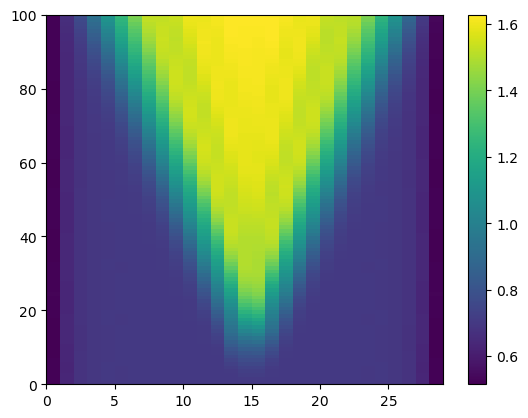

In [127]:
#plt.imshow
#plt.pcolormesh
#plt.plot()
#T = np.arange(1,201,1)
#print(T)
#Hey = [T,S]
plt.pcolormesh(C[0], cmap = 'viridis')
plt.colorbar()

Plot of Correlation Function

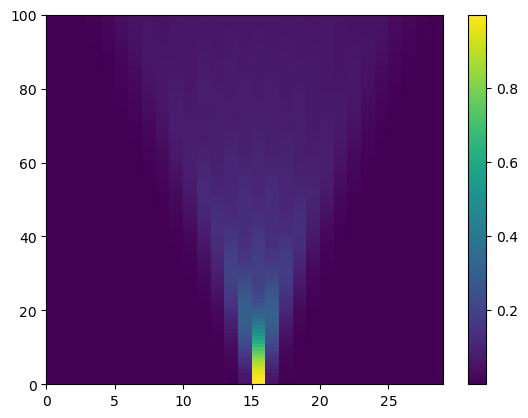

In [128]:
plt.pcolormesh(np.abs(C[1]), cmap = 'viridis')
plt.colorbar()

## Part b 

Now we have found C(t,j)= C_t,j which is a matrix (list) with each row corresponding to a specific time step where correlation function is evaluated for each site j (for sigmay_j) 

In [ ]:
def Fourier_transform(Point):
   return np.FFT.FFT(Point)

for t in range (1,C.shape[0]):
   for j in range(1,C.shape[1]):
      Fourier_transform(C[t,j])


In [ ]:
len()